<a href="https://colab.research.google.com/github/ardayekh/ProfessionalDataEngineer/blob/main/Smart_Analytics%2C_Machine_Learning%2C_and_AI_on_GCP_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="red">**--------------------[Week1 - Day1]--------------------**

- Machine learning use standard algorithms to trains models (1 algorithm can be used for different use cases)

- Once trained, it is then called a model

- A model requires a lot of data and it is as good as he data it is fed 


**AI versus ML, versus Deep Learning**

- AI has to do with the theory and methods to build machines that can solve problems by thinking and acting like humans.

- Machine Learning within Ai is a toolset you can use Machine Learning to scalably solve certain kinds of problems using data examples. But without the need for any custom code.

- Deep Learning is a type of Machine Learning that works even when the data consists of unstructured data, like images, speech, video, natural language text and so on.

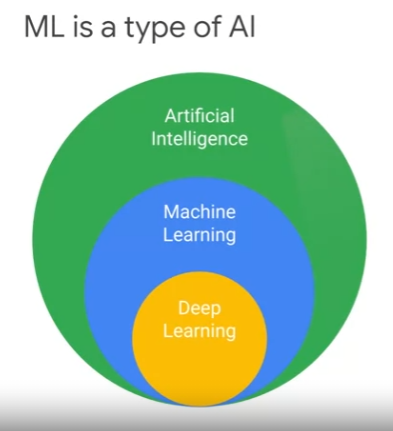

** ML Options on GCP**

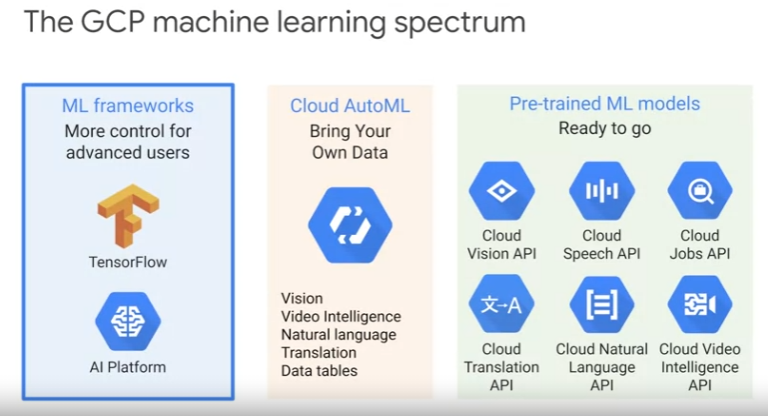

lab:

The Cloud Natural Language API lets you extract entities from text, perform sentiment and syntactic analysis, and classify text into categories. In this lab, we'll focus on text classification. Using a database of 700+ categories, this API feature makes it easy to classify a large dataset of text.

What you'll learn
Creating a Natural Language API request and calling the API with curl

Using the NL API's text classification feature

Using text classification to understand a dataset of news articles

- Enable Natural language API
- Create API Key to tell API your project ID 
- run cloud shell and create a text file containing text to be sent to the NL API for categorization
- to categorize multiple text files, create a python script that calls API and iterate through text files then store results in a bigquery table

  - first create an empty bigquery table with fields such as article text, category, confidence etc.
  - create a service account. This will be used to authenticate to the Natural Language API and BigQuery from a Python script.
  - write python script (see below)
  - run python script

In [ ]:
from google.cloud import storage, language_v1, bigquery
# Set up our GCS, NL, and BigQuery clients
storage_client = storage.Client()
nl_client = language_v1.LanguageServiceClient()
# TODO: replace YOUR_PROJECT with your project id below
bq_client = bigquery.Client(project='YOUR_PROJECT')
dataset_ref = bq_client.dataset('news_classification_dataset')
dataset = bigquery.Dataset(dataset_ref)
table_ref = dataset.table('article_data') # Update this if you used a different table name
table = bq_client.get_table(table_ref)
# Send article text to the NL API's classifyText method
def classify_text(article):
        response = nl_client.classify_text(
                document=language_v1.types.Document(
                        content=article,
                        type_='PLAIN_TEXT'
                )
        )
        return response
rows_for_bq = []
files = storage_client.bucket('cloud-training-demos-text').list_blobs()
print("Got article files from GCS, sending them to the NL API (this will take ~2 minutes)...")
# Send files to the NL API and save the result to send to BigQuery
for file in files:
        if file.name.endswith('txt'):
                article_text = file.download_as_bytes()
                nl_response = classify_text(article_text)
                if len(nl_response.categories) > 0:
                        rows_for_bq.append((str(article_text), str(nl_response.categories[0].name), nl_response.categories[0].confidence))
print("Writing NL API article data to BigQuery...")
# Write article text + category data to BQ
errors = bq_client.insert_rows(table, rows_for_bq)
assert errors == []

- magic functions allow you to execute system commands from within notebook cells. There are magic functions to check the contents of your current directory. You can also define custom magic functions, the BigQuery magic function shown in this slide allows you to execute BigQuery queries.

- The BigQuery magic function allows you to save the query output to a Pandas data frame so that you can manipulate it further. 

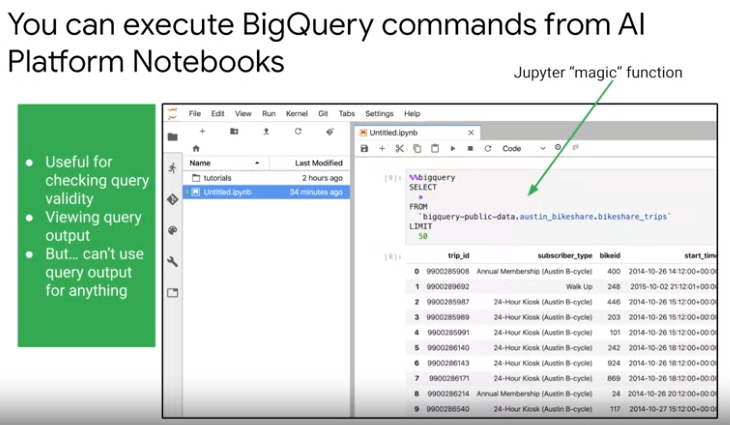

- In this example we are saving the output of a query to a Pandas data frame named df

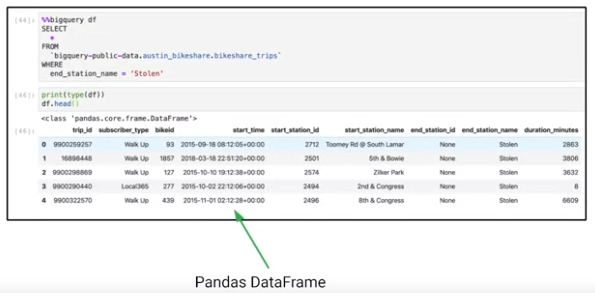